In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("movies.csv")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
import pandas as pd

movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')


terminator_movie_id = movies_df[movies_df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]

average_rating = terminator_ratings['rating'].mean()

print("The average user rating for 'Terminator 2: Judgment Day (1991)' is:", average_rating)


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


In [6]:
import pandas as pd

movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')  

matrix_movie_id = movies_df[movies_df['title'] == "Matrix, The (1999)"]['movieId'].values[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()

print("Tags submitted by users for 'Matrix, The (1999)':")
for tag in matrix_tags:
    print(tag)

Tags submitted by users for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


C:\Users\UDAY\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


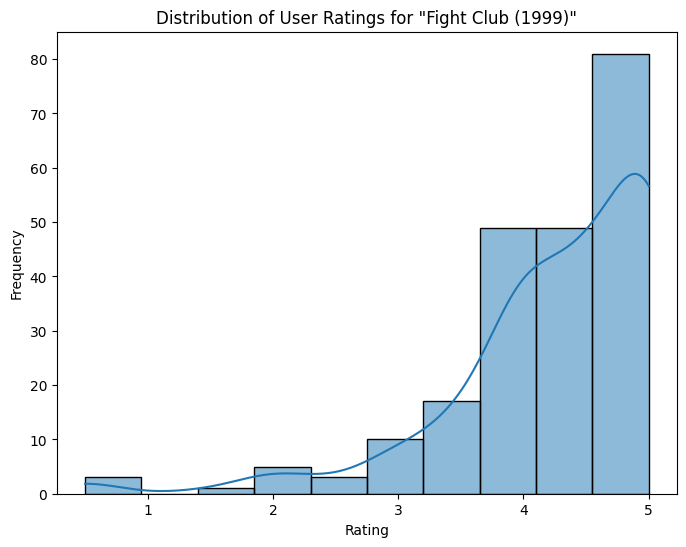

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

fight_club_movie_id = movies_df[movies_df['title'] == "Fight Club (1999)"]['movieId'].values[0]

fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

plt.figure(figsize=(8, 6))
sns.histplot(fight_club_ratings['rating'], kde=True, bins=10)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [8]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')  
movies = pd.read_csv('movies.csv')    

grouped_ratings = ratings.groupby('movieId').agg(
    count=('rating', 'size'),  
    mean_rating=('rating', 'mean')  
).reset_index()

merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

print(filtered_movies)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  count  mean_rating  
0     Adventure|Animation|Children|Comedy|Fantasy    215     3.920930  
1                      Adventure|Children|Fantasy    110     3.431818  
2                                  Comedy|Romance     52     3.259615  
5                           Action|Crime|Thriller    102     3.946078  
6                          

In [9]:
import pandas as pd

# Load the data
ratings = pd.read_csv('ratings.csv')  
movies = pd.read_csv('movies.csv')    

grouped_ratings = ratings.groupby('movieId').agg(
    count=('rating', 'size'), 
    mean_rating=('rating', 'mean') 
).reset_index()

merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

most_popular_movie = filtered_movies.loc[filtered_movies['mean_rating'].idxmax()]

print("Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['mean_rating']:.2f}")


Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43


In [10]:
import pandas as pd

ratings = pd.read_csv('ratings.csv') 
movies = pd.read_csv('movies.csv')  

grouped_ratings = ratings.groupby('movieId').agg(
    count=('rating', 'size'), 
    mean_rating=('rating', 'mean')  
).reset_index()

merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

top_5_movies = filtered_movies.nlargest(5, 'count')

movies_to_check = [
    "Pulp Fiction (1994)",
    "Bad Boys (1995)",
    "Silence of the Lambs, The (1991)",
    "Matrix, The (1999)"
]

top_5_titles = top_5_movies['title'].tolist()
movies_in_top_5 = [movie for movie in movies_to_check if movie in top_5_titles]

print("Movies from the list that are in the top 5 based on number of user ratings:")
for movie in movies_in_top_5:
    print(movie)

Movies from the list that are in the top 5 based on number of user ratings:
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [11]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')  
movies = pd.read_csv('movies.csv')    

grouped_ratings = ratings.groupby('movieId').agg(
    count=('rating', 'size'),  
    mean_rating=('rating', 'mean')  
).reset_index()

merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

sci_fi_sorted = sci_fi_movies.sort_values(by='count', ascending=False)
third_most_popular_sci_fi = sci_fi_sorted.iloc[2] 

print("Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['count']}")

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Number of Ratings: 238


In [13]:
import pandas as pd

ratings = pd.read_csv('ratings.csv')  
movies = pd.read_csv('movies.csv')    

grouped_ratings = ratings.groupby('movieId').agg(
    count=('rating', 'size'),  
    mean_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

filtered_movies.to_csv('filtered_movies.csv', index=False)

print("Filtered movies saved to 'filtered_movies.csv'")


Filtered movies saved to 'filtered_movies.csv'


In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

filtered_movies = pd.read_csv('filtered_movies.csv')

links = pd.read_csv('links.csv')

print("Filtered Movies Columns:", filtered_movies.columns)
print("Links Columns:", links.columns)

movies_with_links = pd.merge(filtered_movies, links, on='movieId', how='inner')

def scrape_imdb_reviews(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        reviews = soup.find_all('span', {'data-testid': 'review-body'})
        review_texts = [review.get_text() for review in reviews]
        
        return review_texts
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return []

movie_reviews = {}

for index, row in movies_with_links.iterrows():
    movie_title = row['title']
    imdb_url = row['imdbId']
    reviews = scrape_imdb_reviews(imdb_url)
    movie_reviews[movie_title] = reviews

with open('movie_reviews.txt', 'w') as file:
    for title, reviews in movie_reviews.items():
        file.write(f"Movie: {title}\n")
        file.write("Reviews:\n")
        for review in reviews:
            file.write(f"- {review}\n")
        file.write("\n")

print("Scraping complete. Reviews saved to movie_reviews.txt")


Filtered Movies Columns: Index(['movieId', 'title', 'genres', 'count', 'mean_rating'], dtype='object')
Links Columns: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Error scraping 114709: Invalid URL '114709': No scheme supplied. Perhaps you meant http://114709?
Error scraping 113497: Invalid URL '113497': No scheme supplied. Perhaps you meant http://113497?
Error scraping 113228: Invalid URL '113228': No scheme supplied. Perhaps you meant http://113228?
Error scraping 113277: Invalid URL '113277': No scheme supplied. Perhaps you meant http://113277?
Error scraping 114319: Invalid URL '114319': No scheme supplied. Perhaps you meant http://114319?
Error scraping 113189: Invalid URL '113189': No scheme supplied. Perhaps you meant http://113189?
Error scraping 112346: Invalid URL '112346': No scheme supplied. Perhaps you meant http://112346?
Error scraping 112641: Invalid URL '112641': No scheme supplied. Perhaps you meant http://112641?
Error scraping 114388: Invalid URL '114388'

In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

filtered_movies = pd.read_csv('filtered_movies.csv')

links = pd.read_csv('links.csv')

movies_with_links = pd.merge(filtered_movies, links, on='movieId', how='inner')

def scrape_imdb_rating(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        rating = soup.find('span', itemprop='ratingValue')
        if rating:
            return float(rating.get_text())
        else:
            return None
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

movie_ratings = {}

for index, row in movies_with_links.iterrows():
    movie_id = row['movieId']
    imdb_url = row['imdbId']  
    rating = scrape_imdb_rating(imdb_url)
    if rating is not None:
        movie_ratings[movie_id] = rating

ratings_df = pd.DataFrame(list(movie_ratings.items()), columns=['movieId', 'imdb_rating'])

ratings_df['imdb_rating'] = pd.to_numeric(ratings_df['imdb_rating'], errors='coerce')

ratings_df = ratings_df.dropna(subset=['imdb_rating'])

highest_rated_movie = ratings_df.loc[ratings_df['imdb_rating'].idxmax()]

print("MovieId of the movie with the highest IMDB rating:")
print(highest_rated_movie['movieId'])


Error scraping 114709: Invalid URL '114709': No scheme supplied. Perhaps you meant http://114709?
Error scraping 113497: Invalid URL '113497': No scheme supplied. Perhaps you meant http://113497?
Error scraping 113228: Invalid URL '113228': No scheme supplied. Perhaps you meant http://113228?
Error scraping 113277: Invalid URL '113277': No scheme supplied. Perhaps you meant http://113277?
Error scraping 114319: Invalid URL '114319': No scheme supplied. Perhaps you meant http://114319?
Error scraping 113189: Invalid URL '113189': No scheme supplied. Perhaps you meant http://113189?
Error scraping 112346: Invalid URL '112346': No scheme supplied. Perhaps you meant http://112346?
Error scraping 112641: Invalid URL '112641': No scheme supplied. Perhaps you meant http://112641?
Error scraping 114388: Invalid URL '114388': No scheme supplied. Perhaps you meant http://114388?
Error scraping 112281: Invalid URL '112281': No scheme supplied. Perhaps you meant http://112281?
Error scraping 11316

ValueError: attempt to get argmax of an empty sequence

In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

filtered_movies = pd.read_csv('filtered_movies.csv')

links = pd.read_csv('links.csv')

movies_with_links = pd.merge(filtered_movies, links, on='movieId', how='inner')

def scrape_imdb_rating(movie_id):
    try:
        url = f'https://www.imdb.com/title/{movie_id}/'
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        rating = soup.find('span', itemprop='ratingValue')
        if rating:
            return float(rating.get_text())
        else:
            return None
    except Exception as e:
        print(f"Error scraping {movie_id}: {e}")
        return None

movie_ratings = {}

for index, row in movies_with_links.iterrows():
    movie_id = row['movieId']
    rating = scrape_imdb_rating(movie_id)
    if rating is not None:
        movie_ratings[movie_id] = rating

ratings_df = pd.DataFrame(list(movie_ratings.items()), columns=['movieId', 'imdb_rating'])

ratings_df['imdb_rating'] = pd.to_numeric(ratings_df['imdb_rating'], errors='coerce')

ratings_df = ratings_df.dropna(subset=['imdb_rating'])

movies_with_ratings = pd.merge(filtered_movies, ratings_df, on='movieId')

sci_fi_movies = movies_with_ratings[movies_with_ratings['genres'].str.contains('Sci-Fi', na=False)]

highest_rated_sci_fi = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

print(highest_rated_sci_fi['movieId'])


Error scraping 1: 404 Client Error:  for url: https://www.imdb.com/title/1/
Error scraping 2: 404 Client Error:  for url: https://www.imdb.com/title/2/
Error scraping 3: 404 Client Error:  for url: https://www.imdb.com/title/3/
Error scraping 6: 404 Client Error:  for url: https://www.imdb.com/title/6/
Error scraping 7: 404 Client Error:  for url: https://www.imdb.com/title/7/
Error scraping 10: 404 Client Error:  for url: https://www.imdb.com/title/10/
Error scraping 11: 404 Client Error:  for url: https://www.imdb.com/title/11/
Error scraping 16: 404 Client Error:  for url: https://www.imdb.com/title/16/
Error scraping 17: 404 Client Error:  for url: https://www.imdb.com/title/17/
Error scraping 19: 404 Client Error:  for url: https://www.imdb.com/title/19/
Error scraping 21: 404 Client Error:  for url: https://www.imdb.com/title/21/
Error scraping 25: 404 Client Error:  for url: https://www.imdb.com/title/25/
Error scraping 32: 404 Client Error:  for url: https://www.imdb.com/title/

ValueError: attempt to get argmax of an empty sequence